# NifTi Study

In [1]:
import os, sys
import shutil
import math
import time
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import voxelmorph as vxm
import neurite as ne
import nibabel as nib

In [2]:
np.set_printoptions(precision=2, suppress=True)

In [3]:
DIR_PATH = 'F:/20210730_samples'
SAVE_PATH = os.path.join(DIR_PATH, 'nifty')
CT_PATH = os.path.join(SAVE_PATH, 'CT')
PT_PATH = os.path.join(SAVE_PATH, 'PT')

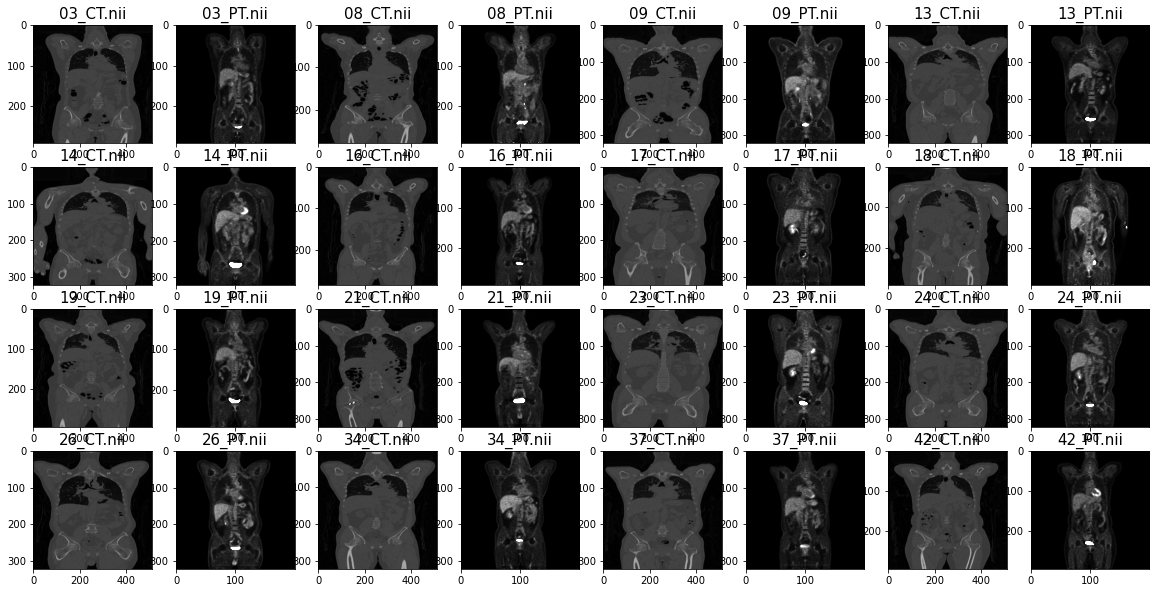

In [28]:
fig, axes = plt.figure(figsize=(20,10)), []
cmap = [plt.cm.gray, plt.cm.gray]
vmax = [3071, 5]
view = 1
grid = (4,8)

for i in range(len(os.listdir(CT_PATH))):

    CT_PATH_LIST = sorted(os.listdir(CT_PATH))[i]
    PT_PATH_LIST = sorted(os.listdir(PT_PATH))[i]
    CT_NIF_PATH = os.path.join(CT_PATH, CT_PATH_LIST)
    PT_NIF_PATH = os.path.join(PT_PATH, PT_PATH_LIST)

    patient_num = int(CT_PATH_LIST[:int(CT_PATH_LIST.find('_'))])

    voxel_1 = nib.load(CT_NIF_PATH).get_fdata()
    voxel_2 = nib.load(PT_NIF_PATH).get_fdata()

    mid_len_1 = int(voxel_1.shape[view]/2)
    mid_len_2 = int(voxel_2.shape[view]/2)

    axes.append(fig.add_subplot(grid[0], grid[1], 2*i+1))
    axes[-1].set_title(CT_PATH_LIST, fontsize=15)
    if view == 0:   plt.imshow(voxel_1[mid_len_1,:,::-1].T, aspect='auto', cmap=cmap[0], vmax=vmax[0])
    elif view == 1: plt.imshow(voxel_1[:,mid_len_1,::-1].T, aspect='auto', cmap=cmap[0], vmax=vmax[0])
    else:           plt.imshow(voxel_1[:,:,mid_len_1],   aspect='auto', cmap=cmap[0], vmax=vmax[0])

    axes.append(fig.add_subplot(grid[0], grid[1], 2*i+2))
    axes[-1].set_title(PT_PATH_LIST, fontsize=15)
    if view == 0:   plt.imshow(voxel_2[mid_len_2,:,::-1].T, aspect='auto', cmap=cmap[1], vmax=vmax[1], vmin=0)
    elif view == 1: plt.imshow(voxel_2[:,mid_len_2,::-1].T, aspect='auto', cmap=cmap[1], vmax=vmax[1], vmin=0)
    else:           plt.imshow(voxel_2[:,:,mid_len_2],   aspect='auto', cmap=cmap[1], vmax=vmax[1], vmin=0)

In [29]:
for i in range(len(os.listdir(CT_PATH))):

    CT_PATH_LIST = sorted(os.listdir(CT_PATH))[i]
    PT_PATH_LIST = sorted(os.listdir(PT_PATH))[i]
    CT_NIF_PATH = os.path.join(CT_PATH, CT_PATH_LIST)
    PT_NIF_PATH = os.path.join(PT_PATH, PT_PATH_LIST)

    patient_num = int(CT_PATH_LIST[:int(CT_PATH_LIST.find('_'))])

    voxel_1 = nib.load(CT_NIF_PATH).get_fdata()
    voxel_2 = nib.load(PT_NIF_PATH).get_fdata()
    print ('{:02d}'.format(patient_num), end=' ')
    print ('CT [{:.1f} {:.1f}]'.format(np.min(voxel_1), np.max(voxel_1)), end=' ')
    print ('PT [{:.1f} {:.1f}]'.format(np.min(voxel_2), np.max(voxel_2)))

03 CT [-1024.0 3070.0] PT [0.0 202.2]
08 CT [-1024.0 3071.0] PT [0.0 169.3]
09 CT [-1024.0 3071.0] PT [0.0 98.3]
13 CT [-1024.0 3071.0] PT [0.0 65.2]
14 CT [-1024.0 3071.0] PT [0.0 87.3]
16 CT [-1024.0 3071.0] PT [0.0 65.7]
17 CT [-1024.0 3071.0] PT [0.0 78.0]
18 CT [-1024.0 3071.0] PT [0.0 206.7]
19 CT [-1024.0 3071.0] PT [0.0 126.7]
21 CT [-1024.0 3071.0] PT [0.0 92.4]
23 CT [-1024.0 3071.0] PT [0.0 83.1]
24 CT [-1024.0 3071.0] PT [0.0 326.9]
26 CT [-1024.0 3071.0] PT [0.0 110.2]
34 CT [-1024.0 3071.0] PT [0.0 190.2]
37 CT [-1024.0 3071.0] PT [0.0 16.2]
42 CT [-1024.0 3071.0] PT [0.0 135.3]
